In [9]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Load preprocessed data and the scaler
X_train = np.load("../data/processed/X_train.npy")
y_train = np.load("../data/processed/y_train.npy")
X_val = np.load("../data/processed/X_val.npy")
y_val = np.load("../data/processed/y_val.npy")
X_test = np.load("../data/processed/X_test.npy")
y_test = np.load("../data/processed/y_test.npy")

scaler = joblib.load("../data/processed/scaler.pkl")

In [3]:
# Build GRU model
model = Sequential([
    GRU(512, return_sequences=False, input_shape=(X_train.shape[1], 1)),  # GRU layer
    Dense(1)  # Output layer for predicting stock price
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
27/27 [==============================] - 6s 144ms/step - loss: 0.0108 - val_loss: 0.0023
Epoch 2/50
27/27 [==============================] - 4s 130ms/step - loss: 4.4305e-04 - val_loss: 9.0641e-04
Epoch 3/50
27/27 [==============================] - 3s 125ms/step - loss: 2.9815e-04 - val_loss: 6.6704e-04
Epoch 4/50
27/27 [==============================] - 3s 127ms/step - loss: 2.5431e-04 - val_loss: 6.3502e-04
Epoch 5/50
27/27 [==============================] - 4s 130ms/step - loss: 2.3558e-04 - val_loss: 6.4115e-04
Epoch 6/50
27/27 [==============================] - 3s 126ms/step - loss: 2.4017e-04 - val_loss: 6.2510e-04
Epoch 7/50
27/27 [==============================] - 4s 144ms/step - loss: 2.4323e-04 - val_loss: 6.1242e-04
Epoch 8/50
27/27 [==============================] - 4s 136ms/step - loss: 2.2829e-04 - val_loss: 6.1516e-04
Epoch 9/50
27/27 [==============================] - 3s 128ms/step - loss: 2.2709e-04 - val_loss: 6.5423e-04
Epoch 10/50
27/27 [=================

In [4]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
val_loss = model.evaluate(X_val, y_val)
test_loss = model.evaluate(X_test, y_test)

print(f"Training Loss: {train_loss}")
print(f"Validation Loss: {val_loss}")
print(f"Test Loss: {test_loss}")

6/6 [==============================] - 0s 27ms/step - loss: 6.2628e-04
Training Loss: 0.00016162787505891174
Validation Loss: 0.0004173752386122942
Test Loss: 0.0006262808456085622


In [5]:
# Make predictions
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 31ms/step


In [6]:
# Reverse the scaling for predictions and actual values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

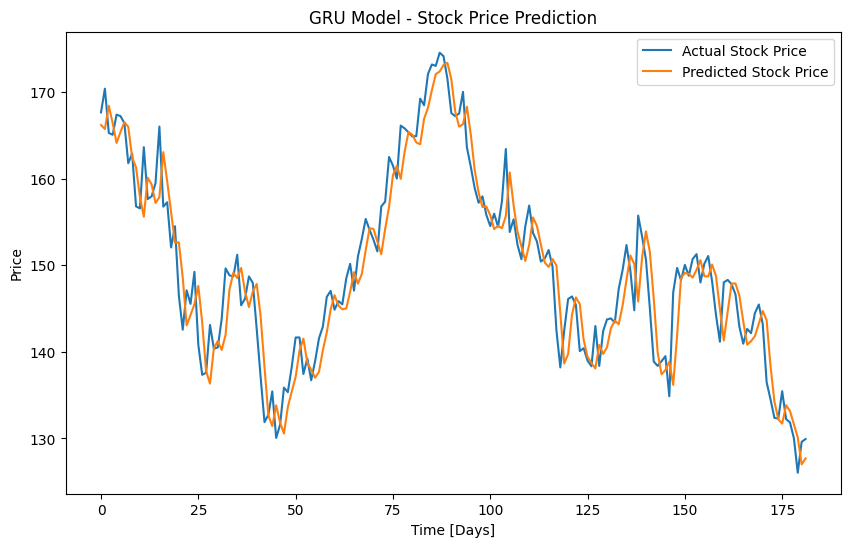

In [11]:
# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label="Actual Stock Price")
plt.plot(y_pred_rescaled, label="Predicted Stock Price")
plt.title("GRU Model - Stock Price Prediction")
plt.xlabel("Time [Days]")
plt.ylabel("Price")
plt.legend()
plt.savefig('../plots/gru_model_prediction.png')
plt.show()

In [10]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.9438000773335555
R-squared (R²): 0.8857702124212012


### **Key Observations:**

1. **Improved Performance:**

    - Compared to the LSTM model, the GRU model achieved a lower **Test Loss** (0.0006263 vs. 0.0007171) and a slightly better MAE (2.9438 vs. 3.1461).
    - The **R-squared (R²)** value for the GRU model is also higher (0.8858), meaning it explains about 88.58% of the variance in stock prices, compared to 86.92% for LSTM. This indicates that the GRU model offers a slight improvement in capturing the variability in stock prices.

2. **Overfitting Reduced:**

    - The Validation Loss for the GRU model is 0.0004174, lower than both RNN and LSTM models, suggesting that the GRU model is generalizing better to unseen data.

3. **Prediction Accuracy:**

    - The MAE of 2.9438 means that the model's predictions, on average, are off by about $2.94 from the actual stock prices. This is an improvement over both RNN and LSTM models, indicating higher accuracy.


In [13]:
# Save the gru model
model.save('../models/gru_model.keras')